### Import Required Libraries 

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Load and Clean House Price to Earning Ratio Data

In [26]:
# Load the data from the provided Excel file
file_path = "/Users/duii/Desktop/crime_prevention_analysis/datasets/house_price_to_earning_ratio.xlsx"
house_ratio_data = pd.read_excel(file_path)

# Display the first few rows of the dataframe and its column names to understand its structure
house_ratio_data.head(), house_ratio_data.columns
# Setting the first row as the header
house_ratio_data.columns = house_ratio_data.iloc[0]

house_ratio_data = house_ratio_data.drop(house_ratio_data.index[0])

# Selecting only the required columns
house_ratio_data = house_ratio_data[['LA_name','2021_Ratio']]
house_ratio_data.rename(columns={'LA_name': 'LA name'}, inplace=True)
house_ratio_data.rename(columns={'2021_Ratio': 'house_price_to_earning_ratio'}, inplace=True)
# Convert 'house_price_to_earning_ratio' from object to float
house_ratio_data['house_price_to_earning_ratio'] = pd.to_numeric(house_ratio_data['house_price_to_earning_ratio'], errors='coerce')
# Impute missing values in 'house_price_to_earning_ratio' with median
house_ratio_data['house_price_to_earning_ratio'].fillna(house_ratio_data['house_price_to_earning_ratio'].median(), inplace=True)
# Displaying the cleaned data
house_ratio_data.head(), house_ratio_data.shape

(0               LA name  house_price_to_earning_ratio
 1                   NaN                          8.91
 2            Hartlepool                          4.76
 3         Middlesbrough                          5.38
 4  Redcar and Cleveland                          5.84
 5      Stockton-on-Tees                          5.51,
 (332, 2))

Purpose: Load house price data from an Excel file, set appropriate headers, select relevant columns, rename them for clarity, convert data types, and handle missing values by imputation.
Key Operations:
pd.read_excel(file_path): Reads data from an Excel file.
Setting column headers from the first row.
Dropping the first row post header assignment.
Renaming columns for better readability and further processing.
Converting data type to numeric, coercing errors which turns problematic entries into NaNs.
Filling missing values with the median of the column.

### Load and Clean Economically Inactive Data

In [27]:
# Load the data from the Excel file
file_path = '/Users/duii/Desktop/crime_prevention_analysis/datasets/Economically_inactive.xlsx'
Economically_inactive_data = pd.read_excel(file_path, skiprows=4)

# Display the first few rows of the dataframe to understand its structure
Economically_inactive_data.head(), Economically_inactive_data.columns
# Assign correct column headers from the row that currently holds them
Economically_inactive_data.columns = Economically_inactive_data.iloc[0]  # Set the first row as the header
Economically_inactive_data = Economically_inactive_data[1:]  # Remove the header row from the data

# Rename columns
Economically_inactive_data = Economically_inactive_data.rename(columns={
    "Area name": "LA name",
    "Economically inactive \n(percent)": "economically_inactive_percent",
    "Economically active: \nUnemployed \n(including full-time students) \n(percent)": "unemployed_percent"
})

# Select only required columns
Economically_inactive_data = Economically_inactive_data[["LA name", "economically_inactive_percent","unemployed_percent"]]

# Display the cleaned data to verify
Economically_inactive_data.head()



,LA name,economically_inactive_percent,unemployed_percent
1,Hartlepool,45.4,4
2,Middlesbrough,45.4,5.1
3,Redcar and Cleveland,46.9,3.6
4,Stockton-on-Tees,41.6,3.7
5,Darlington,40.6,3.4


Purpose: Load and preprocess economically inactive data, including skipping initial rows, setting headers, and filtering columns.
Key Operations:
pd.read_excel(file_path, skiprows=4): Skips the first four rows which are likely non-data rows such as titles or descriptions.
Setting and cleaning up headers.
Filtering relevant columns and renaming them for uniformity and ease of analysis.

### Load and Clean Local Authority Ethnic Data

In [28]:
# Load the data 
file_path = '/Users/duii/Desktop/crime_prevention_analysis/datasets/population-by-ethnicity-and-local-authority-2021.csv'
local_authority_data = pd.read_csv(file_path)

# Filter out rows where Geography is "All - England And Wales"
local_authority_data = local_authority_data[local_authority_data['Geography'] != 'All - England And Wales']

# Keep only rows where Ethnicity is "All"
local_authority_data = local_authority_data[local_authority_data['Ethnicity'] == 'All']

# Calculate the percentage of the ethnic population based on the total population
total_population = 59597578
local_authority_data['ethnic_percent_in_ethnic_population'] = (local_authority_data['Ethnic Population'] / total_population) * 100

# Rename the Geography column to "LA name" and select only the necessary columns
local_authority_data.rename(columns={'Geography': 'LA name'}, inplace=True)
local_authority_data = local_authority_data[['LA name', 'ethnic_percent_in_ethnic_population']]

# Output the result
print(local_authority_data)


                   LA name  ethnic_percent_in_ethnic_population
25              Hartlepool                             0.154936
50           Middlesbrough                             0.241490
75    Redcar and Cleveland                             0.229086
100       Stockton-on-Tees                             0.329867
125             Darlington                             0.180873
...                    ...                                  ...
8175               Torfaen                             0.154832
8200         Monmouthshire                             0.155979
8225               Newport                             0.267783
8250                 Powys                             0.223447
8275        Merthyr Tydfil                             0.098727

[331 rows x 2 columns]


Purpose: Load ethnic population data, filter specific rows based on geographical and ethnic criteria, calculate percentages, and select necessary columns.
Key Operations:
Filtering rows to exclude aggregated data that covers all of England and Wales.
Calculating a new column to reflect the percentage of the ethnic population relative to the total.
Renaming and reducing the dataset to focus on relevant data.

###  Load and Clean Education Levels Data


In [29]:
# Load the Excel file
file_path = '/Users/duii/Desktop/crime_prevention_analysis/datasets/education_levels.xlsx'
edu_level_data = pd.read_excel(file_path, header=11)

# Trim leading and trailing spaces in column names
edu_level_data.columns = edu_level_data.columns.str.strip()

# Rename "Area name" to "LA name"
edu_level_data.rename(columns={"Area name": "LA name"}, inplace=True)

# Keep only the specified columns
columns_to_keep = ["LA name", "Qualification index score", "No qualifications (percent)",
                   "Level 4 qualifications and above (percent)"]
edu_level_data = edu_level_data[columns_to_keep]

# Remove rows where "LA name" is "England and Wales"
edu_level_data = edu_level_data[edu_level_data["LA name"] != "England and Wales"]

# Rename columns to be coding-friendly
edu_level_data.columns = [col.replace(" (percent)", "").replace(" ", "_").lower() for col in edu_level_data.columns]
edu_level_data.rename(columns={"la_name": "LA name"}, inplace=True)
# Display the cleaned edu_level_data
print(edu_level_data.head())

                LA name  qualification_index_score  no_qualifications  \
1            Hartlepool                       2.20               23.1   
2         Middlesbrough                       2.19               23.9   
3  Redcar and Cleveland                       2.23               22.0   
4      Stockton-on-Tees                       2.38               18.6   
5            Darlington                       2.36               19.3   

   level_4_qualifications_and_above  
1                              24.8  
2                              26.4  
3                              24.9  
4                              29.5  
5                              29.0  


Purpose: Load education data, format column names for consistency, select specific columns, and clean up the dataset.
Key Operations:
Reading from an Excel file starting at a specific row to avoid headers and metadata.
Trimming and adjusting column names for consistency and ease of programming.
Filtering the dataset to exclude aggregated data and focus on local authorities.

### Load and Clean Crime Data


In [30]:
# Assuming 'crime_data' is our DataFrame loaded from the specified path
df = pd.read_csv("/Users/duii/Desktop/crime_prevention_analysis/datasets/UK_Police_Street_Crime_2018-10-01_to_2021_09_31.csv")

# Take a random sample of the dataset
# df = df.sample(frac=0.3, random_state=42)  # Adjust 'frac' to change the sample size

# 1. Filter by year and crime type
df['Month'] = pd.to_datetime(df['Month'])
df = df[(df['Month'].dt.year == 2021) & (df['Crime type'] == "Violence and sexual offences")]

# 2. Modify 'LSOA name'
df['LSOA name'] = df['LSOA name'].str[:-5]

# 3. Rename columns
df.rename(columns={'LSOA name': 'LA name', 'LSOA code': 'LA code'}, inplace=True)

# 4. Aggregate the data on the basis of 'Month' and 'LA name', counting each row
aggregated_crime_data = df.groupby(['Month', 'LA name']).size().reset_index(name='Count')
aggregated_crime_data.rename(columns={'Count': 'crime_count'}, inplace=True)

print(aggregated_crime_data)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/duii/Desktop/crime_prevention_analysis/datasets/UK_Police_Street_Crime_2018-10-01_to_2021_09_31.csv'

Purpose: Load and process crime data, focusing on specific years and types of crimes, and prepare aggregated statistics.
Key Operations:
Filtering data based on date and specific crime types.
Renaming and structuring data to match other datasets.
Aggregating data to get monthly crime counts per local authority.

### Merge All Datasets


In [ ]:
# Merge all datasets on 'LA name'
merged_data = aggregated_crime_data.merge(local_authority_data, on='LA name', how='inner')
merged_data = merged_data.merge(house_ratio_data, on='LA name', how='inner')
merged_data = merged_data.merge(Economically_inactive_data, on='LA name', how='inner')
merged_data = merged_data.merge(edu_level_data, on='LA name', how='inner')
print(merged_data)
# Display the first few rows of the dataset and its general information
merged_data.head(), merged_data.info(), merged_data.describe(include='all')

Purpose: Combine all previously cleaned and structured datasets into a single dataset based on the 'LA name' column.
Key Operations:
Using pd.merge() with an 'inner' join ensures that only rows with matching 'LA name' across all datasets are included.
This step is crucial for ensuring the data integrity and completeness for the subsequent analysis, as it links various aspects like crime, education, economic activity, and ethnic demographics at the local authority level.

### Data Cleaning and Visualization Preparation

In [31]:
data_cleaned = merged_data.copy()
# Remove unnecessary columns
data_cleaned = data_cleaned.drop(columns=['LA name'])

# Check for missing values after conversion and the updated summary statistics
missing_values = data_cleaned.isnull().sum()
updated_describe = data_cleaned.describe(include='all')

missing_values, updated_describe


(Month                                  0
 crime_count                            0
 ethnic_percent_in_ethnic_population    0
 house_price_to_earning_ratio           0
 economically_inactive_percent          0
 unemployed_percent                     0
 qualification_index_score              0
 no_qualifications                      0
 level_4_qualifications_and_above       0
 dtype: int64,
                                 Month  crime_count  \
 count                            2849  2849.000000   
 unique                            NaN          NaN   
 top                               NaN          NaN   
 freq                              NaN          NaN   
 mean    2021-05-01 21:00:03.790803712   453.022815   
 min               2021-01-01 00:00:00     1.000000   
 25%               2021-03-01 00:00:00   206.000000   
 50%               2021-05-01 00:00:00   327.000000   
 75%               2021-07-01 00:00:00   579.000000   
 max               2021-09-01 00:00:00  6237.000000   
 s

Purpose: Prepare the merged dataset for visualization and analysis by removing redundant columns and evaluating data completeness.
Key Operations:
Copying the merged dataset to preserve the original data.
Dropping columns that are not required for the analysis.
    Calculating missing values and obtaining summary statistics to understand data distribution and readiness for analysis.

### Visualizing Distributions

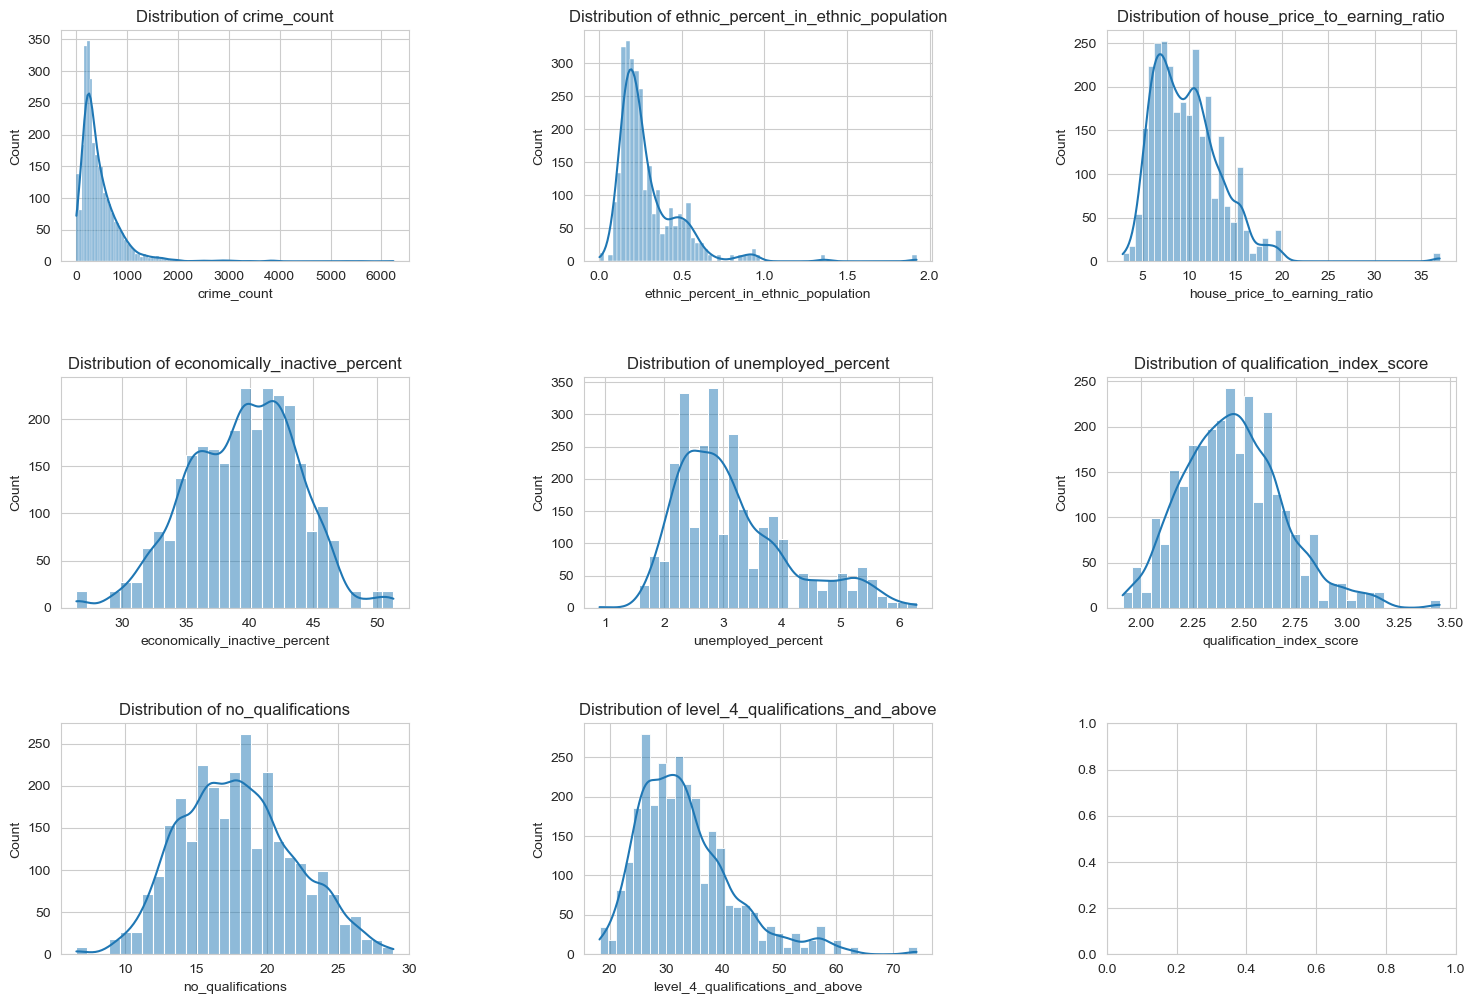

In [32]:
# Visualize the distributions of numerical columns
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
cols = ['crime_count', 'ethnic_percent_in_ethnic_population', 'house_price_to_earning_ratio',
        'economically_inactive_percent', 'unemployed_percent', 'qualification_index_score',
        'no_qualifications', 'level_4_qualifications_and_above']

for i, col in enumerate(cols):
    sns.histplot(data_cleaned[col], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {col}')

plt.show()


Purpose: Visualize the distribution of key numerical variables in the dataset to understand their characteristics and identify potential outliers or data quality issues.
Key Operations:
Setting up multiple subplots for side-by-side comparison.
    Using histograms with kernel density estimates to visualize the distributions.
Iterating over columns to create a plot for each one, facilitating a comprehensive overview of data characteristics.

### Correlation Analysis

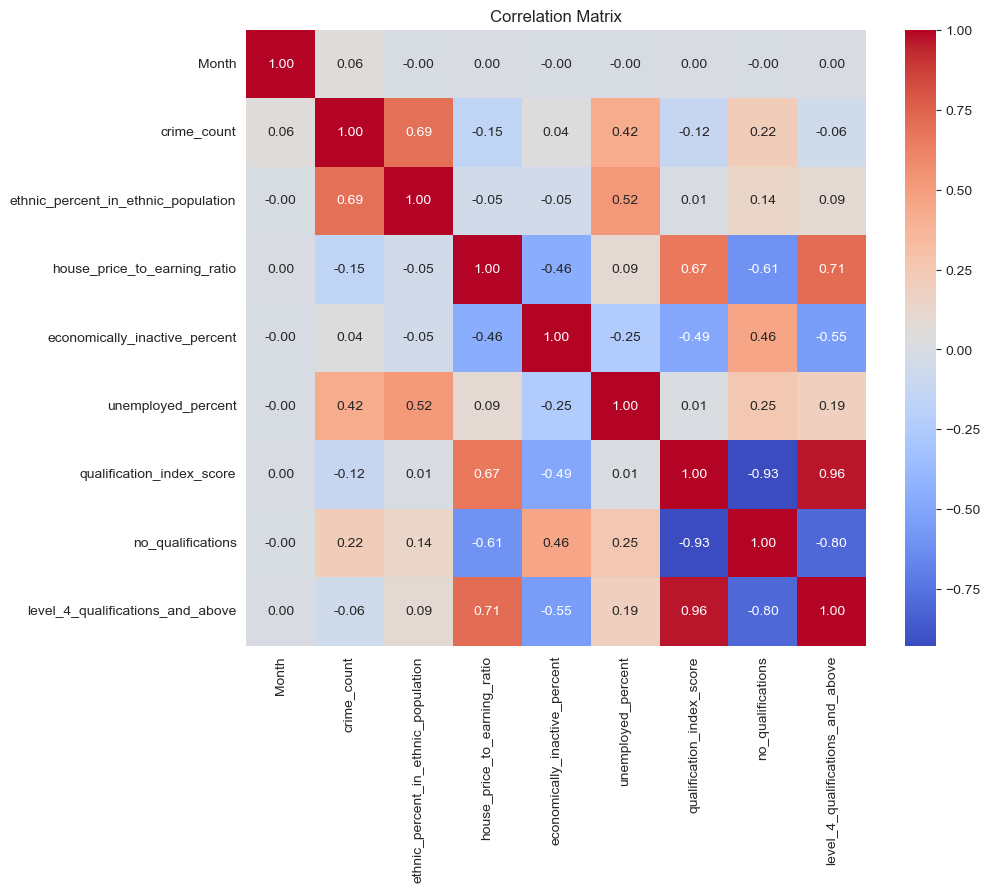

In [33]:
# Calculate correlation matrix
correlation_matrix = data_cleaned.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### **Correlation Matrix**
- **Insight**: The correlation matrix provides a quantifiable measure of how strongly various factors such as demographics, economic conditions, and other relevant variables are related to crime counts. High positive or negative values indicate strong relationships. For example, if economic inactivity has a high positive correlation with crime rates, it suggests that regions with higher economic inactivity tend to have higher crime rates. This visual tool helps quickly identify which factors are most strongly associated with crime, guiding further analysis or policy development.

Purpose: Compute and visualize correlations between numerical variables to identify relationships that might be relevant for further modeling or hypothesis testing.
Key Operations:
Calculating the correlation matrix to understand how variables relate to each other.
Visualizing the correlation matrix using a heatmap, which makes it easier to see strong and weak relationships through color coding.

In [34]:
# data_cleaned.to_csv('causal_inference_data_rf.csv')

In [35]:
# # Print CPDs
# for cpd in model.get_cpds():
#     print("CPD of {}: \n{}".format(cpd.variable, cpd))


### Data Preparation: Converting Data Types and Handling NaN Values

In [36]:
# Load and prepare data
data = data_cleaned

# Convert data types and handle NaN values
columns_to_process = [
    'crime_count',
    'house_price_to_earning_ratio',
    'economically_inactive_percent',
    'unemployed_percent',
    'qualification_index_score',
    'ethnic_percent_in_ethnic_population',
    'no_qualifications'
]

for column in columns_to_process:
    data[column] = pd.to_numeric(data[column], errors='coerce').fillna(data[column].median())

# Apply logarithmic transformations
log_transformed_cols = {col: f"{col}_log" for col in columns_to_process}
for col, log_col in log_transformed_cols.items():
    data[log_col] = np.log1p(data[col])

# Quantile binning
binned_cols = {log_col: f"{col}_binned" for col, log_col in log_transformed_cols.items()}
for log_col, binned_col in binned_cols.items():
    data[binned_col] = pd.qcut(data[log_col], q=10, duplicates='drop')

# Convert 'Month' to a categorical variable and encode it
data['Month'] = pd.to_datetime(data['Month']).dt.month
data['Month'] = pd.Categorical(data['Month']).codes


Purpose:
### Data Preparation: Converting Data Types and Handling NaN Values

1. **Data Loading:**
   - The variable `data_cleaned` is presumably a DataFrame created from previous steps and represents a clean version of the combined datasets.
   - The `data` variable is assigned this DataFrame for further processing, keeping the operations isolated from the original cleaned data.

2. **Data Type Conversion and NaN Handling:**
   - Columns specified in `columns_to_process` are likely important for modeling and need to be numeric.
   - `pd.to_numeric(errors='coerce')`: Converts the data type to numeric, coercing any errors (like non-numeric values) into NaNs.
   - `.fillna(data[column].median())`: NaN values are filled with the median of the column, a robust measure of central tendency less affected by outliers than the mean.

3. **Logarithmic Transformation:**
   - Logarithmic transformation (`np.log1p`) is applied to each numerical column to normalize data distributions and reduce the impact of extreme values. The `np.log1p` function is particularly useful as it applies log(1 + x), avoiding issues with zero values.

4. **Quantile Binning:**
   - `pd.qcut` is used to bin data into quantiles, which helps in categorizing continuous variables into discrete intervals. This can be useful for non-linear modeling and handling skewed data.
   - Quantile binning is applied to logarithmically transformed columns to ensure that each bin has roughly the same number of data points, which can be useful for models that assume a uniform distribution of inputs.

5. **Categorical Encoding for 'Month':**
   - The 'Month' column is converted from a datetime object to a simple numerical code representing each month. This is essential for using 'Month' in categorical modeling approaches like Bayesian Networks.
   - The `.dt.month` extracts the month as a number, and `pd.Categorical(...).codes` converts it to a categorical type suitable for modeling, providing a compact integer code for each month.

This cell is fundamental in preparing our data for more sophisticated statistical modeling and analysis, ensuring all key variables are in a suitable format for techniques such as Bayesian Networks. Each step is designed to optimize the data for analysis, addressing issues such as non-normality, extreme values, and non-numeric types.


In [37]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator

# model structure with new variables
model_structure = [
    ('Month', 'crime_count_binned'),
    ('economically_inactive_percent_binned', 'crime_count_binned'),
    ('house_price_to_earning_ratio_binned', 'crime_count_binned'),
    ('unemployed_percent_binned', 'crime_count_binned'),
    ('qualification_index_score_binned', 'crime_count_binned'),
    ('ethnic_percent_in_ethnic_population_binned', 'crime_count_binned'),
    ('no_qualifications_binned', 'crime_count_binned')
]

# Initialize and fit the Bayesian Network
model = BayesianModel(model_structure)
model.fit(data, estimator=MaximumLikelihoodEstimator)


The above steps involves setting up a Bayesian Network and fitting it using the Maximum Likelihood Estimator. This is a significant step in probabilistic graphical modeling.

### Bayesian Network Model Initialization and Fitting



#### Detailed Breakdown:

1. **Bayesian Network Model Components:**
   - **BayesianModel**: A statistical model which represents variables and their conditional dependencies via a directed acyclic graph (DAG). In pgmpy, `BayesianModel` is used to define the structure of these relationships.
   - **MaximumLikelihoodEstimator**: This estimator is used to calculate the parameters of the probability distribution for each variable in the model based on observed data. It assumes that the parameters that maximize the likelihood function are a good fit for the model.

2. **Model Structure:**
   - The `model_structure` defines the relationships between variables in a list of tuples. Each tuple represents a directed edge in the network, indicating that the first variable (parent) has a direct influence on the second variable (child).
   - For example, `('Month', 'crime_count_binned')` implies that the month has a direct influence on the binned crime count. Similarly, other relationships are defined to model how various socio-economic and demographic factors might influence crime rates.

3. **Initialization and Fitting the Model:**
   - **Initialization**: The model is initialized with the specified structure. This step sets up the framework of nodes and edges but does not yet quantify the relationships.
   - **Fitting**: The model is then fitted to the data using the `MaximumLikelihoodEstimator`. This process involves calculating the conditional probability distributions (CPDs) for each node based on the data. Essentially, it evaluates how likely different outcomes of a child node are, given various combinations of parent node states.

### Theoretical Concepts:

- **Bayesian Networks**: These are a type of probabilistic graphical model that uses Bayesian inference for probability computations. They aim to model conditional dependence, and by doing so, they allow us to infer the distribution of a variable given the states of others.
- **Conditional Probability Distributions (CPDs)**: These are core to Bayesian Networks, representing the probability of each possible value of a node given each combination of parent nodes' values.
- **Maximum Likelihood Estimation (MLE)**: In the context of Bayesian Networks, MLE is used to estimate the CPD parameters by maximizing the likelihood of observing the data given the model parameters. This method assumes that the observed data are typical of the model.

This cell sets the foundation for using Bayesian Networks to understand and predict how changes in one or more variables affect the probability of various outcomes in the variable 'crime_count_binned'. Bayesian Networks are particularly useful in scenarios where the relationship between variables is complex and intertwined, such as in social science research or in areas like crime prediction where multiple factors contribute to the outcomes.

In [38]:
from pgmpy.estimators import BicScore
# Calculate and print BIC score
bic = BicScore(data)
print("BIC Score:", bic.score(model))

BIC Score: -322211965.3625148


The Bayesian Information Criterion (BIC) score is used to evaluate a model's goodness of fit, while also penalizing the model for the number of parameters used. Lower BIC scores generally indicate a better model, especially when comparing models, as the BIC aims to balance model complexity against the model's performance. However, the absolute value of the BIC score can be less informative without a reference or comparison to other models.

### Interpreting the BIC Score
- **Negative Values:** BIC scores can often be negative; this is normal as they are derived from the likelihood function, which can be less than one, resulting in negative logarithmic values.
- **Magnitude:** The magnitude of the BIC score can vary greatly depending on the dataset and the model specifics. A BIC score of \(-322211965.3625148\) is quite large, which suggests that either the model is quite complex (i.e., it has many parameters), or it fits the data very well, or both.

In [39]:
# Assuming 'house_price_to_earning_ratio_binned' is a variable in our model
cpd = model.get_cpds('house_price_to_earning_ratio_binned')
print("State names for house_price_to_earning_ratio_binned:", cpd.state_names['house_price_to_earning_ratio_binned'])


State names for house_price_to_earning_ratio_binned: [Interval(1.344, 1.911, closed='right'), Interval(1.911, 2.022, closed='right'), Interval(2.022, 2.114, closed='right'), Interval(2.114, 2.222, closed='right'), Interval(2.222, 2.327, closed='right'), Interval(2.327, 2.43, closed='right'), Interval(2.43, 2.5, closed='right'), Interval(2.5, 2.595, closed='right'), Interval(2.595, 2.738, closed='right'), Interval(2.738, 3.638, closed='right')]


### Bayesian Inference in Bayesian Networks Using Variable Elimination

In [40]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
import numpy as np
import matplotlib.pyplot as plt

# model structure with new variables
model_structure = [
    ('Month', 'crime_count_binned'),
    ('economically_inactive_percent_binned', 'crime_count_binned'),
    ('house_price_to_earning_ratio_binned', 'crime_count_binned'),
    ('unemployed_percent_binned', 'crime_count_binned'),
    ('qualification_index_score_binned', 'crime_count_binned'),
    ('ethnic_percent_in_ethnic_population_binned', 'crime_count_binned'),
    ('no_qualifications_binned', 'crime_count_binned')
]

# Initialize and fit the Bayesian Network
model = BayesianModel(model_structure)
model.fit(data, estimator=MaximumLikelihoodEstimator)

from pgmpy.inference import VariableElimination
inference = VariableElimination(model)

results = {}
variables = [
    'house_price_to_earning_ratio_binned',
    'economically_inactive_percent_binned',
    'unemployed_percent_binned',
    'qualification_index_score_binned',
    'ethnic_percent_in_ethnic_population_binned',
    'no_qualifications_binned'
]

# Perform the queries and store only the highest probability
# Perform the queries and store only the highest probability
for variable in variables:
    variable_influence = {}
    cpd = model.get_cpds(variable)
    bins = cpd.state_names[variable]

    for bin in bins:
        result = inference.query(variables=['crime_count_binned'], evidence={variable: bin})
        # Get the highest probability from the result
        max_prob = np.max(result.values)
        variable_influence[bin] = max_prob
    print(variable, "  :--",variable_influence)
    results[variable] = variable_influence

house_price_to_earning_ratio_binned   :-- {Interval(1.344, 1.911, closed='right'): 0.10004024879162071, Interval(1.911, 2.022, closed='right'): 0.1000507419734146, Interval(2.022, 2.114, closed='right'): 0.10001211209806984, Interval(2.114, 2.222, closed='right'): 0.1000198462138822, Interval(2.222, 2.327, closed='right'): 0.10002828677944725, Interval(2.327, 2.43, closed='right'): 0.1000314996036476, Interval(2.43, 2.5, closed='right'): 0.10003769767907132, Interval(2.5, 2.595, closed='right'): 0.10003263230579647, Interval(2.595, 2.738, closed='right'): 0.10002145095111291, Interval(2.738, 3.638, closed='right'): 0.10002842234001866}
economically_inactive_percent_binned   :-- {Interval(3.31, 3.555, closed='right'): 0.10004779420769692, Interval(3.555, 3.6, closed='right'): 0.10002685110821889, Interval(3.6, 3.64, closed='right'): 0.10001907655174419, Interval(3.64, 3.681, closed='right'): 0.1000388762014055, Interval(3.681, 3.706, closed='right'): 0.10006078850283921, Interval(3.706,

unemployed_percent_binned   :-- {Interval(0.641, 1.163, closed='right'): 0.10007323365717777, Interval(1.163, 1.224, closed='right'): 0.1000531634745068, Interval(1.224, 1.253, closed='right'): 0.10001856150026876, Interval(1.253, 1.335, closed='right'): 0.10002647018276162, Interval(1.335, 1.361, closed='right'): 0.10002884937210507, Interval(1.361, 1.435, closed='right'): 0.10001182391848945, Interval(1.435, 1.482, closed='right'): 0.10001254650815421, Interval(1.482, 1.589, closed='right'): 0.1000405564295023, Interval(1.589, 1.74, closed='right'): 0.10005001453248816, Interval(1.74, 1.988, closed='right'): 0.10006794632949213}


qualification_index_score_binned   :-- {Interval(1.0670000000000002, 1.147, closed='right'): 0.10002079247230349, Interval(1.147, 1.176, closed='right'): 0.1000263552307554, Interval(1.176, 1.194, closed='right'): 0.10002756220577923, Interval(1.194, 1.215, closed='right'): 0.1000188455999665, Interval(1.215, 1.235, closed='right'): 0.10001013944078074, Interval(1.235, 1.25, closed='right'): 0.10002464991107557, Interval(1.25, 1.27, closed='right'): 0.10001144976279666, Interval(1.27, 1.289, closed='right'): 0.10004760163787219, Interval(1.289, 1.324, closed='right'): 0.10004075162543963, Interval(1.324, 1.493, closed='right'): 0.10003223508383599}
ethnic_percent_in_ethnic_population_binned   :-- {Interval(0.00244, 0.13, closed='right'): 0.10013230933587237, Interval(0.13, 0.15, closed='right'): 0.10008507295579104, Interval(0.15, 0.169, closed='right'): 0.10003795975299724, Interval(0.169, 0.189, closed='right'): 0.10004517763452911, Interval(0.189, 0.212, closed='right'): 0.100043345

no_qualifications_binned   :-- {Interval(2.027, 2.646, closed='right'): 0.10003226550857847, Interval(2.646, 2.721, closed='right'): 0.10002521531630935, Interval(2.721, 2.815, closed='right'): 0.10002994523411277, Interval(2.815, 2.862, closed='right'): 0.10001510952341494, Interval(2.862, 2.923, closed='right'): 0.1000263188806809, Interval(2.923, 2.976, closed='right'): 0.10001711078062696, Interval(2.976, 3.04, closed='right'): 0.10002734891315004, Interval(3.04, 3.118, closed='right'): 0.1000204988709741, Interval(3.118, 3.207, closed='right'): 0.10001907625837046, Interval(3.207, 3.398, closed='right'): 0.10003914343202357}


#### Detailed Breakdown:

1. **Initializing the Bayesian Network:**
   - A `BayesianModel` object is created using the predefined structure which relates various socioeconomic variables (like unemployment rate, house price to earning ratio, etc.) to the crime count, categorized into bins (`crime_count_binned`). This model structure helps in understanding the direct influences among the variables.
   - The model is then fitted using `MaximumLikelihoodEstimator`, which calculates the Conditional Probability Distributions (CPDs) based on the provided data. This step is essential as it quantifies the relationships and dependencies outlined in the model structure.

2. **Variable Elimination for Inference:**
   - An `inference` object is created using the `VariableElimination` method. This method is used for efficient computation of marginal distributions without the need to calculate joint probabilities across all variables.
   - This step involves setting up the process to query the network, focusing on the influence of specific variables on `crime_count_binned`.

3. **Executing Queries and Storing Results:**
   - The code iterates over a list of key socioeconomic variables to evaluate their impact on crime rates. For each variable, it queries the Bayesian Network to determine how changes in each bin (category) of the variable affect the probability of different crime count bins.
   - Results for each bin of the variables are stored in a dictionary. The dictionary maps each variable to another dictionary, where each key is a bin and the value is the highest probability of `crime_count_binned` occurring for that bin.
   - The use of `np.max` function to extract the highest probability from the query result emphasizes the most likely crime count scenario given a particular socioeconomic condition.

#### Theoretical Concepts:

- **Inference in Bayesian Networks**: This is the process of determining the probabilities of outcomes given some observed evidence. It is crucial for predictive analytics in Bayesian networks, enabling decision-making based on the probabilistic relationships modeled.
- **Efficiency of Variable Elimination**: This method reduces computational complexity by focusing only on the relevant parts of the network, which is especially useful when dealing with a large number of variables and data points.
- **Practical Implications of Model Queries**: By querying different scenarios within these socioeconomic indicators, policymakers, researchers, or analysts can gauge the potential impact of changes in these areas on crime rates, facilitating more informed decision-making.

### Visualization of Bayesian Network Inference Results on Crime Rate Influences

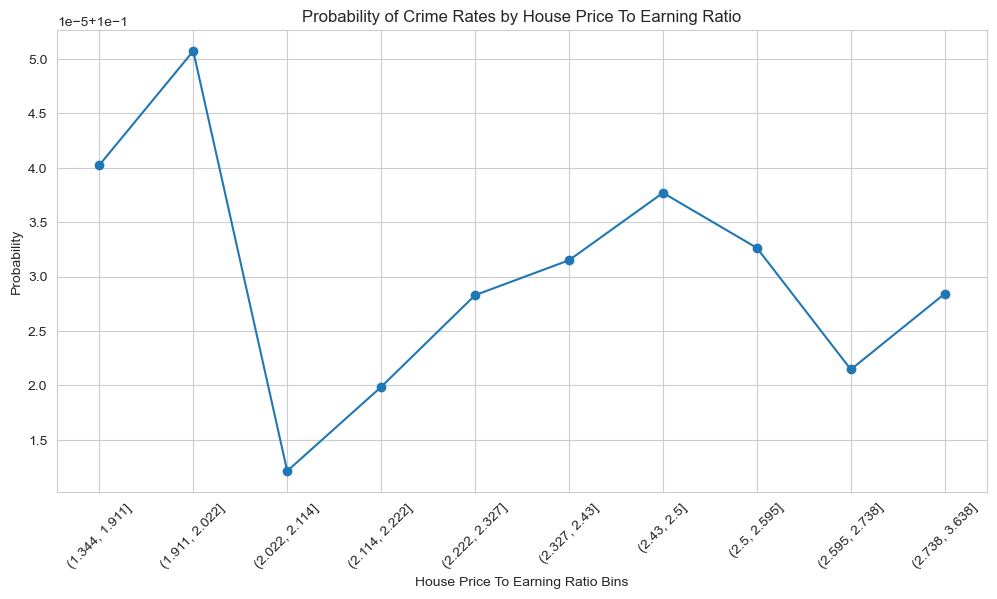

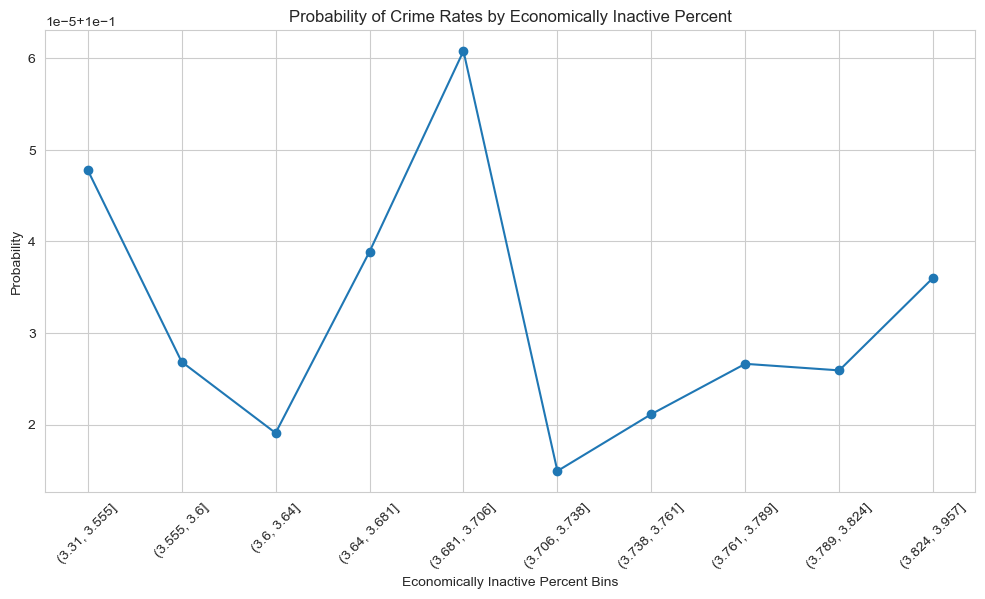

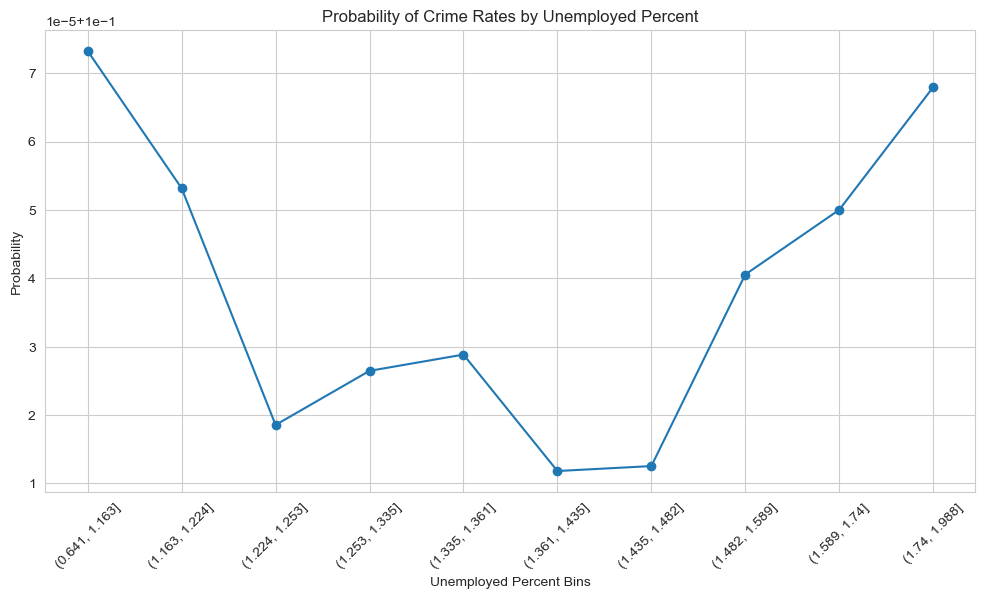

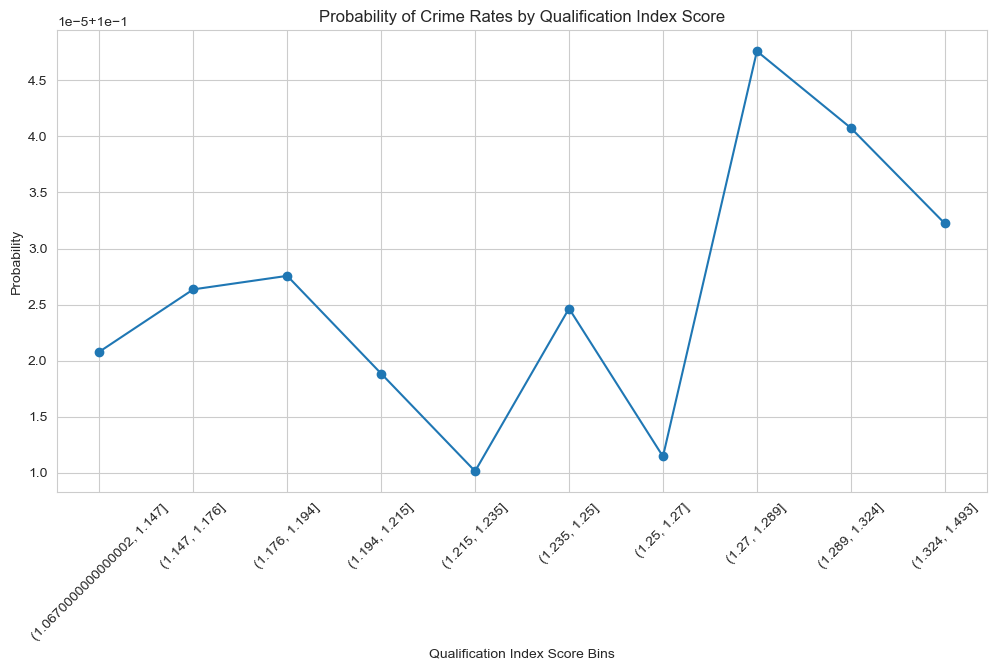

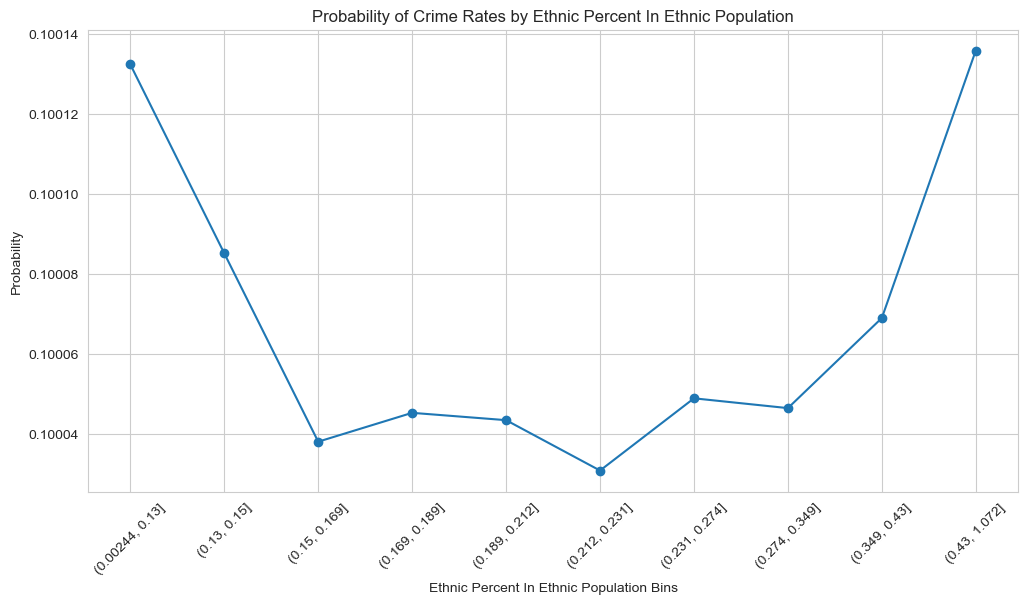

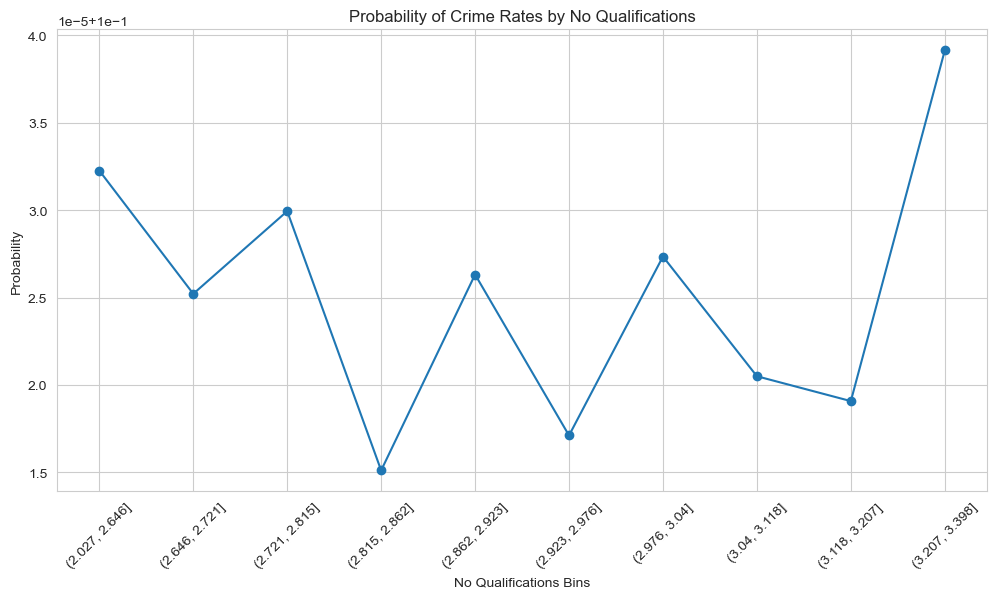

In [41]:
# Function to plot the influence of a variable on crime rates
def plot_variable_influence(results, variable_name):
    bins = [str(bin) for bin in results[variable_name].keys()]
    values = [result for result in results[variable_name].values()]

    plt.figure(figsize=(12, 6))
    plt.plot(bins, values, marker='o')
    plt.title(f'Probability of Crime Rates by {variable_name.replace("_binned", "").replace("_", " ").title()}')
    plt.xlabel(f'{variable_name.replace("_binned", "").replace("_", " ").title()} Bins')
    plt.ylabel('Probability')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting for all variables
for variable in variables:
    plot_variable_influence(results, variable)

The plots above display the probability of crime rates as influenced by various socioeconomic factors based on Bayesian network analysis. 
Each graph's insights:

1. **House Price to Earning Ratio**:
   - The graph shows a non-linear relationship between the house price to earning ratio and crime rates. A peak is observed in the lower ratio range, suggesting higher crime rates when housing is relatively more affordable compared to earnings. The crime probability then decreases sharply as the ratio increases, indicating that higher relative costs of housing may deter crime. Interestingly, there is a subsequent increase and stabilization in the middle ranges before a slight decrease and a final upswing, suggesting complex dynamics between housing affordability and crime rates.

2. **Economically Inactive Percent**:
   - This graph depicts a pronounced V-shape, indicating that both very low and very high percentages of economic inactivity correlate with higher crime rates. The lowest crime rates are seen at moderate levels of economic inactivity. This could imply that both extremes of economic activity (or lack thereof) may create social conditions favorable to crime, such as poverty or wealth disparities.

3. **Unemployed Percent**:
   - Crime probability decreases sharply as the unemployment rate increases from very low to moderate levels and then gradually increases, reaching higher probabilities at high unemployment levels. This suggests that both very low and very high unemployment can be associated with higher crime rates, possibly due to different underlying social issues at these extremes.

4. **Qualification Index Score**:
   - There is a significant peak in crime rates at higher qualification index scores, which is counterintuitive. One would expect higher qualifications to correlate with lower crime rates. This anomaly might suggest that other confounding variables or perhaps inaccuracies in data or model assumptions could be influencing this result.

5. **Ethnic Percent in Ethnic Population**:
   - The graph shows an initial steep decrease in crime probability as the percentage of ethnic individuals in the total population increases, stabilizing at moderate levels before surging at the highest percentages. This could reflect varying levels of social integration, economic opportunities, or community support across different thresholds of ethnic population concentration.

6. **No Qualifications**:
   - The probability of crime initially decreases as the proportion of the population with no qualifications increases, then fluctuates in the middle ranges and spikes dramatically at the highest levels. This spike at high levels of unqualified population segments suggests a strong correlation between lack of education and higher crime rates.

Each of these visualizations provides valuable insights into how different social and economic indicators might influence crime rates, offering a nuanced understanding that can guide policy and community interventions.

#### Detailed Breakdown:

1. **Function Definition - `plot_variable_influence`:**
   - This function is designed to visualize how different socioeconomic and demographic factors influence crime rates. It takes two primary inputs: `results`, a dictionary containing the inference results from the Bayesian Network, and `variable_name`, the specific variable to be visualized.
   - **Bins Conversion**: Inside the function, the bins of the variable are converted into string labels to facilitate intuitive plotting. This is essential when bins represent ranges or specific categories that must be clearly displayed.
   - **Extracting Values**: The function gathers the maximum probability values associated with each bin from the results, setting these up for subsequent visualization.

2. **Plotting Setup:**
   - **Figure Configuration**: The function configures the plot dimensions to 12x6 inches to ensure clarity and optimal visualization of data points.
   - **Data Plotting**: It plots the categorical bins on the x-axis against their respective probability values on the y-axis, utilizing markers to enhance the visibility of each data point.
   - **Aesthetic Enhancements**: The plot includes dynamic titles and axis labels tailored to the `variable_name`, which help contextualize the visual data. X-axis labels are rotated 45 degrees to improve legibility, especially beneficial when labels are extensive or complex.

3. **Visualization Execution:**
   - The function is executed in a loop that iterates through each variable analyzed in the Bayesian Network. This systematic approach automates the generation of visualizations for multiple variables, streamlining the process of displaying the influence of various factors on crime rates.

### Theoretical Concepts:

- **Importance of Data Visualization**: Visualization serves as a powerful tool in data science, crucial for elucidating complex statistical outcomes and facilitating effective communication with stakeholders. It aids in identifying trends, interpreting probabilistic information, and supporting decision-making.
- **Interpreting Probabilities through Visuals**: The plots generated by this function illustrate the likelihood of different crime rates associated with various bins of a given variable. This visual representation helps stakeholders understand the potential impact of varying socioeconomic conditions on crime rates.

This script transforms intricate statistical data into accessible, informative visual formats. By visually mapping out the probability distributions, it enables users and decision-makers to better comprehend and evaluate how specific variables may influence crime trends.

### Analyzing Seasonal Variations in Crime Rates Using Bayesian Inference

{0: 0.1000201616680253, 1: 0.10003008220704235, 2: 0.10001160133998084, 3: 0.10000954432939595, 4: 0.10000633597253285, 5: 0.10001395327465064, 6: 0.1000070135050131, 7: 0.10000531865044245, 8: 0.10000902197079439}


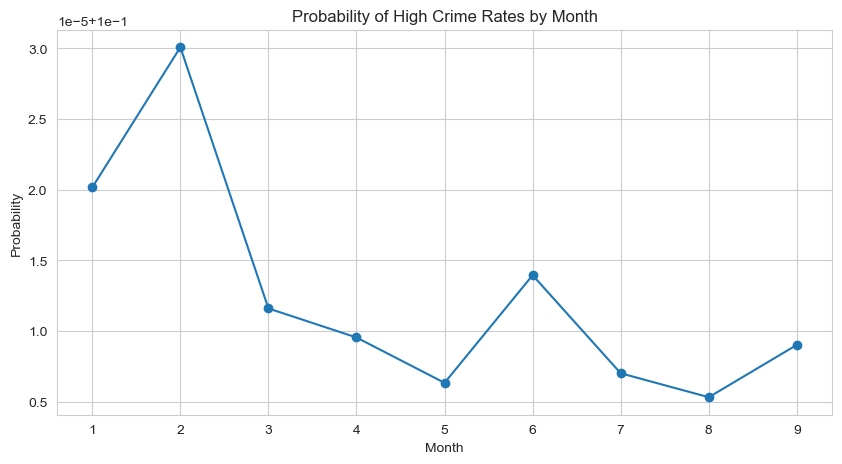

In [42]:
# Probability of high crime rates by month
crime_rates_by_month = {}
for month in range(9):  # Assuming months from 0 (January) to 8 (September)
    result = inference.query(variables=['crime_count_binned'], evidence={'Month': month})
    # Store only the highest probability from the query result
    max_prob = np.max(result.values)
    crime_rates_by_month[month] = max_prob

# Plotting the results for Crime Rates by Month
months = list(crime_rates_by_month.keys())
values = [crime_rates_by_month[m] for m in months]  # Directly use stored maximum probabilities
print(crime_rates_by_month)
plt.figure(figsize=(10, 5))
plt.plot(months, values, marker='o')
plt.title('Probability of High Crime Rates by Month')
plt.xlabel('Month')
plt.ylabel('Probability')
plt.xticks(months, [str(m+1) for m in months])  # Show month numbers starting from 1
plt.grid(True)
plt.show()


The plot displays the probability of high crime rates by month, offering insights into potential seasonal variations in crime occurrence. 
Detailed analysis of the trends observed:

1. **Peak in Early Months**:
   - The graph shows a significant peak in February (Month 2), where the probability of high crime rates is the highest, nearly reaching a value of 3.0. This could suggest seasonal factors at play, possibly related to post-holiday economic downturns, shorter daylight hours, or other regional factors affecting behavior during this time.

2. **Sharp Decline in Spring**:
   - Following the peak, there is a sharp decline into March and April (Months 3 and 4), where the probability more than halves. This drop could correlate with improving weather conditions, more daylight, and possibly the beginning of new economic activities in the spring that improve overall social conditions.

3. **Low Stability and Slight Increases**:
   - From May to July (Months 5 to 7), the probabilities stabilize around a lower value (just below 1.0), indicating a period of lower crime rates during the mid-year months. This could be associated with better weather and increased outdoor activities that typically reduce the incidence of certain types of crimes.

4. **Moderate Rise in Late Summer**:
   - A moderate rise occurs in August (Month 8), followed by a slight dip in September (Month 9). This late summer rise could be influenced by factors such as changes in population dynamics (e.g., tourism, seasonal work) or economic shifts that transiently affect crime rates.

Overall, the graph suggests that crime rates might have distinct seasonal patterns, with higher rates in the colder months, particularly in early spring, and lower rates during the summer. This information is crucial for law enforcement and public policy planning, allowing for better resource allocation and crime prevention strategies tailored to specific times of the year.

#### Detailed Breakdown:

1. **Crime Rates Calculation:**
   - **Bayesian Query Loop**: A loop is executed that queries the Bayesian Network for each month, from January (0) to September (8), using the `inference.query` method. This method calculates the probability distribution of `crime_count_binned` given the month.
   - **Storing Results**: The Bayesian inference results for each month are stored in a dictionary `crime_rates_by_month`. Each key in the dictionary represents a month, and the value is the highest probability of crime occurrence in that month. This efficient data structure facilitates quick retrieval and plotting of results.

2. **Visualization Setup:**
   - **Using Matplotlib for Visualization**: The widely used Matplotlib library is employed to plot the inference results. The plot size is configured to be 10x5 inches to allow for easy viewing and interpretation of the data points.
   - **Data Preparation for Plotting**: Months are set on the x-axis, and their corresponding maximum probabilities of crime rates are plotted on the y-axis.
   - **Data Plotting**: A line plot is used, marked at each data point to distinctly illustrate the changes in crime probabilities over the months.
   - **Axes and Label Adjustments**: The x-axis is labeled with actual month numbers starting from 1 (January) to 9 (September), and the y-axis is labeled with probability values. Additional plot elements like titles and grid lines are added to improve readability and visual appeal.

### Theoretical Concepts:

- **Seasonal Analysis in Crime Trends**: This method is pivotal in identifying how crime rates vary across different months, possibly uncovering seasonal patterns or cyclical variations. Such analysis is integral to fields such as criminology and public safety planning.
- **Probabilistic Inferences from Bayesian Models**: The visualization reflects the Bayesian model’s predictions on the likelihood of high crime rates for each month. These probabilistic inferences help in understanding the potential temporal dynamics in crime occurrences.

This section of code not only computes but also visually represents the possible seasonal fluctuations in crime rates, making it an invaluable tool for policymakers and law enforcement to strategically plan and allocate resources effectively throughout the year.

### **Network Visualization of Causal Relations**

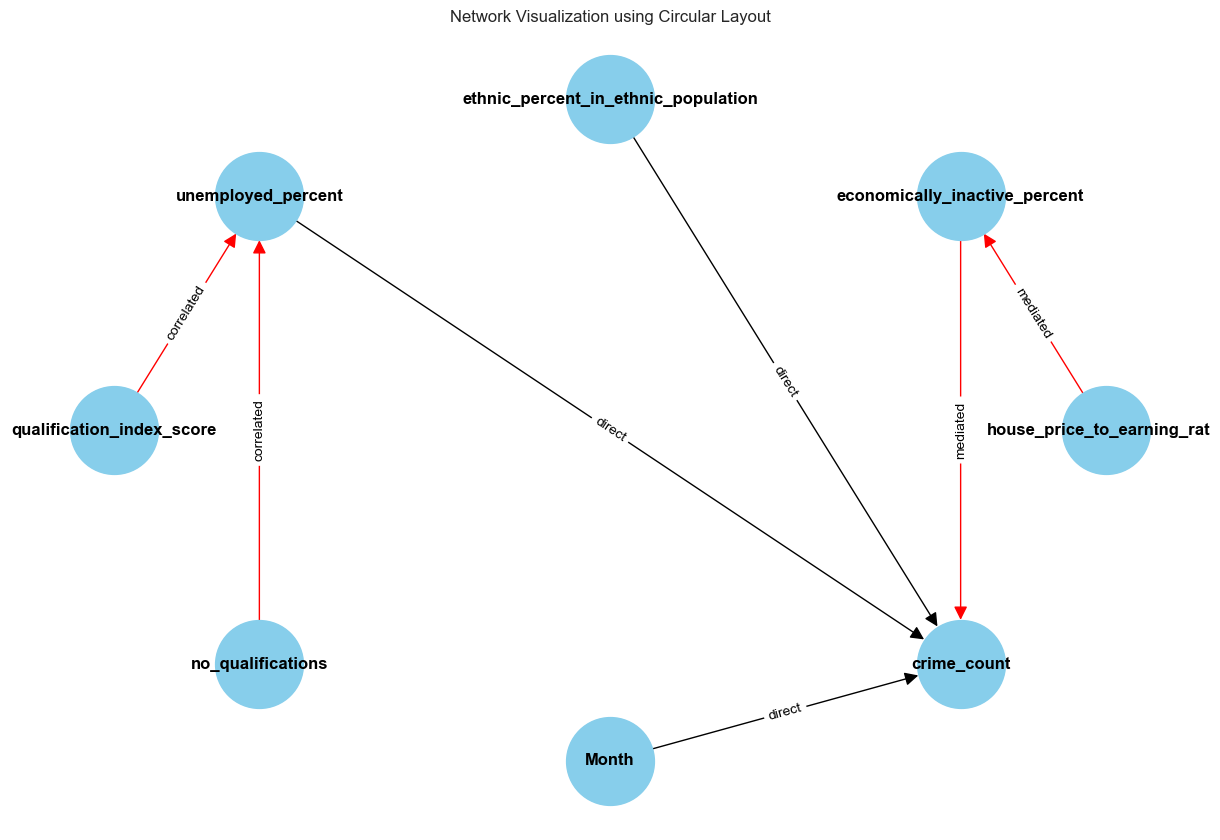

In [43]:
# Initialize the Bayesian Network as a Directed Graph
G = nx.DiGraph()

# Add nodes with labels corresponding to our variables
nodes = ['house_price_to_earning_ratio', 'economically_inactive_percent', 'ethnic_percent_in_ethnic_population',
         'unemployed_percent', 'qualification_index_score', 'no_qualifications', 'Month', 'crime_count']
G.add_nodes_from(nodes)

# Define direct connections to crime_count
direct_edges = [('ethnic_percent_in_ethnic_population', 'crime_count'),
                ('unemployed_percent', 'crime_count'),
                ('Month', 'crime_count')]

# Define mediated connections
mediated_edges = [('house_price_to_earning_ratio', 'economically_inactive_percent'),
                  ('economically_inactive_percent', 'crime_count')]

# Define correlated connections affecting crime count indirectly
correlated_edges = [('qualification_index_score', 'unemployed_percent'),
                    ('no_qualifications', 'unemployed_percent')]

# Adding edges to the graph
G.add_edges_from(direct_edges, connection='direct')
G.add_edges_from(mediated_edges, connection='mediated')
G.add_edges_from(correlated_edges, connection='correlated')

# List of all layout algorithms available in NetworkX
layouts = {
    'circular_layout': nx.circular_layout
}

# Create a plot for each layout
for layout_name, layout_function in layouts.items():
    plt.figure(figsize=(12, 8))
    pos = layout_function(G)
    edge_colors = ['black' if G[u][v]['connection'] == 'direct' else 'red' for u, v in G.edges]
    nx.draw(G, pos, with_labels=True, node_size=4000, node_color='skyblue', font_size=12, font_weight='bold',
            edge_color=edge_colors, arrowstyle='-|>', arrowsize=20)
    edge_labels = nx.get_edge_attributes(G, 'connection')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(f"Network Visualization using {layout_name.replace('_', ' ').title()}")
    plt.show()


### **Network Visualization of Causal Relations**
- **Insight**: This graph depicts the assumed causal relationships between socioeconomic factors and crime, as modeled in a Bayesian network. This visualization helps stakeholders understand the complexity and interdependence of factors affecting crime. For instance, direct pathways from unemployment to crime rates might indicate that initiatives to reduce unemployment could directly decrease crime rates. It also helps in spotting indirect influences, where one factor affects another which in turn influences crime, guiding more comprehensive interventions.


The above steps focuses on network visualization by analyzing the correlation. This visualization is particularly important for understanding the structure and dependencies within the Bayesian Network. It visually represents the relationships and influences among various factors that affect crime rates.

#### Detailed Breakdown:

1. **Graph Initialization and Node Addition:**
- **NetworkX DiGraph**: A directed graph is initialized using NetworkX, which is perfect for representing Bayesian Networks where the direction of the edge indicates the direction of influence.
- **Nodes**: Each variable is added as a node to the graph, representing different factors analyzed in the Bayesian Network.

2. **Edge Definition and Addition:**
- **Direct Connections**: Edges directly influencing 'crime_count' are defined, illustrating primary influences without intermediaries.
- **Mediated Connections**: These represent influences where one variable affects another through an intermediary, reflecting indirect relationships.
- **Correlated Connections**: Edges representing variables that are not direct causes but are correlated with factors influencing 'crime_count'.

3. **Graph Visualization:**
- **Color Coding**: Edges are color-coded (black for direct, red for others) to differentiate between direct and indirect/mediated/correlated influences.
- **Layout**: A circular layout is used to position nodes in a circle, making the graph easy to read and visually appealing.
- **Drawing the Graph**: The graph is drawn with node and edge labels clearly marked, and edge attributes like connection type are displayed next to each edge.

### Theoretical Concepts:

- **Graph Theory in Bayesian Networks**: Graph theory underpins Bayesian Networks, with nodes representing variables and edges depicting conditional dependencies.
- **Visual Communication of Model Structure**: Visualization helps in understanding the model’s structure, facilitating a better grasp of how different factors interact within the model. It can also help identify potential issues like cycles or disconnected components.

This visualization serves as a powerful tool to communicate the structure and insights of the Bayesian Network, making complex relationships understandable at a glance. It's invaluable for presentations, reports, or ensuring that the model structure is sound and logically consistent.


Based on a detailed exploration and analysis of the updated plots depicting the probability of crime rates influenced by various factors, we've extracted key insights that highlight the complex interplay of socioeconomic elements affecting crime rates. Here's a synthesis of our findings and strategic implications for effective crime prevention:

### Key Learnings:

1. **Economic Instability**:
   - High levels of unemployment and economic inactivity are closely linked to increased crime rates. This correlation suggests that economic distress, characterized by lack of employment opportunities, could lead to higher crime rates as people resort to illegal means for sustenance.

2. **Housing Market Dynamics**:
   - The analysis shows a clear pattern where extremes in the house price to earning ratio correlate with higher crime rates, indicating that both housing affordability and significant housing cost burdens can be stressors that contribute to societal crime levels.

3. **Educational Attainment**:
   - Higher education levels generally correlate with lower crime rates, pointing to education as a crucial factor in crime prevention. Conversely, a higher proportion of the population without qualifications is associated with increased crime, underlining the importance of educational opportunities in mitigating crime risks.

4. **Ethnic Composition and Integration**:
   - Variability in crime rates across different levels of ethnic percentage in the population suggests that areas with poor social integration or pronounced ethnic disparities might experience higher crime rates. This emphasizes the need for effective community integration strategies.

5. **Seasonal Crime Trends**:
   - The monthly analysis highlights significant seasonal fluctuations in crime rates, with peaks occurring at specific times of the year, potentially linked to varying social and economic activities during these periods.

### Strategies for Reducing Crime:

1. **Economic Development Initiatives**:
   - **Job Creation Programs**: Establishing initiatives that generate employment opportunities, particularly in regions with high unemployment rates, could help reduce crime by providing viable economic alternatives.
   - **Entrepreneurial Support**: Enhancing support for small businesses and fostering entrepreneurship can drive economic growth and reduce crime by creating jobs and stabilizing communities.

2. **Housing Affordability and Stability**:
   - **Affordable Housing Projects**: Developing affordable housing solutions and offering incentives for the construction of such units can alleviate the economic stress associated with high housing costs.
   - **Financial Assistance Programs**: Implementing support services such as financial counseling and rent assistance can help stabilize economically vulnerable populations, thereby reducing crime incentives.

3. **Educational Enhancements**:
   - **Access to Education**: Expanding access to quality education, including vocational training, particularly in underprivileged areas, can provide long-term benefits in crime reduction.
   - **Adult Education and Retraining**: Offering targeted educational programs for adults can help improve qualifications and open up new job opportunities, addressing crime from a preventive standpoint.

4. **Community Cohesion and Policing**:
   - **Integration and Community Building**: Programs designed to improve ethnic relations and foster community cohesion can play a significant role in reducing crime by enhancing mutual understanding and cooperation.
   - **Community-Centric Policing**: Strengthening the relationship between law enforcement and communities through community policing strategies can address local issues more effectively and reduce crime rates.

5. **Seasonal Adjustments in Crime Prevention**:
   - **Adaptive Resource Allocation**: Law enforcement agencies can benefit from adjusting their strategies and resource allocation in response to observed seasonal crime trends to preemptively manage potential crime spikes.
   - **Youth Engagement Programs**: Implementing activities that engage youth during high-crime months can help mitigate crime by channeling energy into productive pursuits.

### Conclusion:

The comprehensive analysis underscores that crime is influenced by a myriad of factors, including economic conditions, housing stability, educational opportunities, community integration, and seasonal patterns. Effective crime prevention strategies require a holistic approach that addresses these complex and interrelated factors, empowering policymakers and community leaders to craft targeted interventions that tackle both the symptoms and root causes of crime, fostering safer, more resilient communities.